

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

In [7]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [3]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [4]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [5]:
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)

# p-value is > 0.05 so I fail to reject the Hypothesis, so H0 holds True 
#i.e. there is no significant difference between datasets GPU1 and GPU3

[-1.49889438] [0.14509211]


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [9]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [12]:
levene(e1,e2,e3)
# p-value > 0.05 hence all variances are equal and Levene's test is satisfied

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))

In [14]:
f, p = f_oneway(e1,e2,e3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value > 0.05, so we conclude that the null Hypothesis holds True 
#i.e. the results for all three experiments are not significantly different

One-way ANOVA
F value: [2.51357623]
P value: [0.13574645] 



## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [0]:
#a type I error is the rejection of a true null hypothesis (also known as a "false positive" finding)
#a type I error is to falsely infer the existence of something 
#that is not there (confirming to common belief with false information),

In [0]:
#a type II error is the failure to reject a false null hypothesis (also known as a "false negative" finding)
# a type II error is to falsely infer the absence of something 
#that is present (going against the common belief with false information)

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [0]:
# Null Hypothesis states that the waiting time to place and order remains 4.5 minutes

In [0]:
# Alternate Hypothesis states that the waiting time to place and order has changed in the past month
# from its previous population mean value of 4.5 minutes

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [17]:
import scipy.stats as stats
n=10
p=.7
k = [0, 1, 2, 3, 4, 5, 6, 7]
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01])

# Question 7 
Plot the distribution created in the above question.

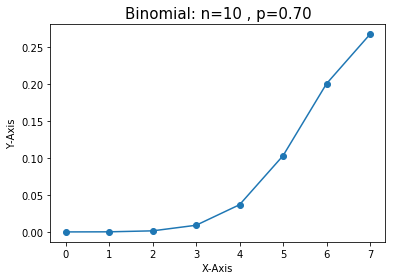

In [19]:
import matplotlib.pyplot as plt
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [21]:
cty_df = pd.read_csv("bigcity.csv")
cty_df

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [34]:
cty_df.drop(cty_df.columns[cty_df.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
cty_df

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


In [35]:
cty_df.shape
# total number of rows are 49

(49, 2)

In [51]:
X = cty_df[['u']]
y = cty_df[['x']]

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [37]:
cty_df[cty_df.isnull().any(axis=1)]

,u,x


C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


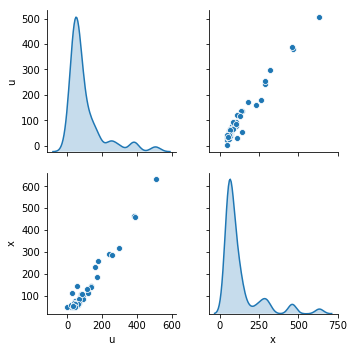

In [38]:
import seaborn as sns
cty_df_attr = cty_df.iloc[:, 0:2]
sns.pairplot(cty_df_attr, diag_kind='kde')

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [39]:
cty_df['u'].corr(cty_df['x'])

0.981741951099581

### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [59]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for u is 1.1594512342174779


In [61]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9.718455322828262


Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


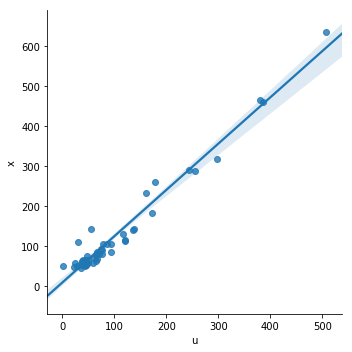

In [62]:
# y=1.1594*x+9.718
sns.lmplot(x="u", y="x", data=cty_df)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [65]:
lm = LinearRegression()
results = lm.fit(X,y)
y_pred = lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [67]:
rmse

22.944591528363304

In [68]:
r2_score(y_test, y_pred)

0.921246186443079

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [48]:
regression_model.score(X_train, y_train)

0.9682175540860046

In [49]:
regression_model.score(X_test, y_test)

0.9181922560396981